<a href="https://colab.research.google.com/github/ManojkumarChenna/BrainTumor/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten ,Dropout ,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image


In [ ]:
import warnings
import glob
warnings.filterwarnings('ignore')

In [ ]:
from zipfile import ZipFile
filename='archive.zip'

with ZipFile(filename,'r') as zip:
  zip.extractall()
  print('DONE')

DONE


In [ ]:
import glob
import cv2
import numpy as np

path_Yes = '/content/yes/*'
path_No = '/content/no/*'

tumor = []
no_tumor = []
random_state = 42

# Loading images with tumor
for file in glob.iglob(path_Yes):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    tumor.append((img, 1))

# Loading images without tumor
for file in glob.iglob(path_No):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    no_tumor.append((img, 0))

all_data = tumor + no_tumor
np.random.shuffle(all_data)


data = np.array([item[0] for item in all_data])
labels = np.array([item[1] for item in all_data])


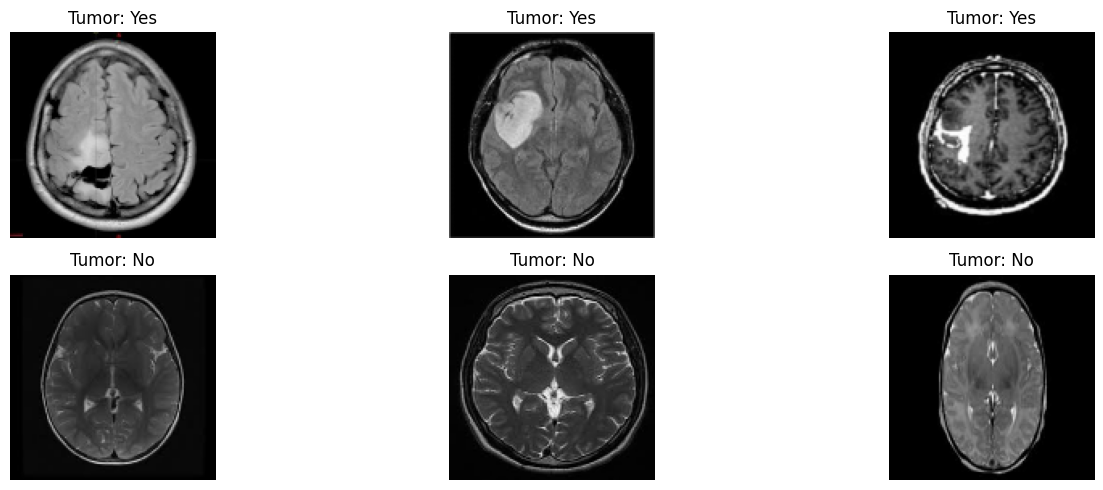

In [ ]:
plt.figure(figsize=(15, 5))

# Display tumor images with label 'yes'
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(tumor[i][0])
    plt.title("Tumor: Yes")
    plt.axis('off')

# Display no_tumor images with label 'no'
for i in range(3):
    plt.subplot(2, 3, i+4)
    plt.imshow(no_tumor[i][0])
    plt.title("Tumor: No")
    plt.axis('off')

plt.tight_layout()
plt.show()

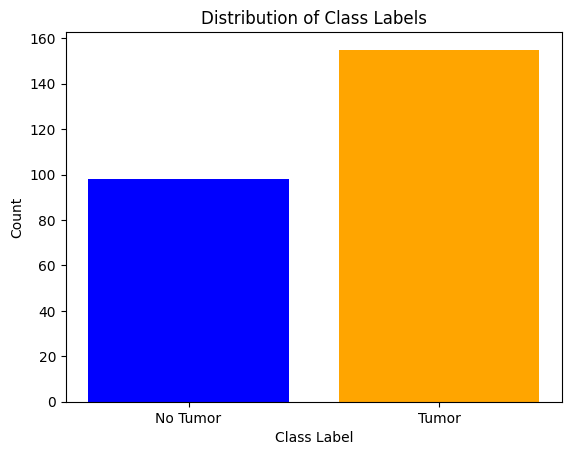

In [ ]:
unique_labels, label_counts = np.unique(labels, return_counts=True)

plt.bar(unique_labels, label_counts, color=['blue', 'orange'])
plt.xticks(unique_labels, ['No Tumor', 'Tumor'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Distribution of Class Labels')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=42)

In [ ]:
x_train= x_train /255.0
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

back = myCallback()

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                   callbacks=[back])

Epoch 1/100
6/6 [==============================] - 9s 1s/step - loss: 0.6998 - accuracy: 0.4720 - val_loss: 0.5910 - val_accuracy: 0.6829
Epoch 2/100
6/6 [==============================] - 5s 855ms/step - loss: 0.6653 - accuracy: 0.6273 - val_loss: 0.6593 - val_accuracy: 0.6585
Epoch 3/100
6/6 [==============================] - 5s 881ms/step - loss: 0.6038 - accuracy: 0.6770 - val_loss: 0.5008 - val_accuracy: 0.7805
Epoch 4/100
6/6 [==============================] - 6s 881ms/step - loss: 0.6183 - accuracy: 0.7081 - val_loss: 0.5316 - val_accuracy: 0.7561
Epoch 5/100
6/6 [==============================] - 5s 843ms/step - loss: 0.5478 - accuracy: 0.7267 - val_loss: 0.4876 - val_accuracy: 0.7805
Epoch 6/100
6/6 [==============================] - 8s 1s/step - loss: 0.5370 - accuracy: 0.7640 - val_loss: 0.5659 - val_accuracy: 0.7561
Epoch 7/100
6/6 [==============================] - 5s 835ms/step - loss: 0.4749 - accuracy: 0.7702 - val_loss: 0.4873 - val_accuracy: 0.7805
Epoch 8/100
6/6 [==

(1, 128, 128, 3)
1/1 [==============================] - 0s 140ms/step
[[0.]]
No Tumor


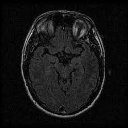

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
image=cv2.imread('/content/download (1).jpeg')
image_resized= cv2.resize(image, (128,128))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

pred=model.predict(image)
print(pred)

if pred[0][0]>0.5:
  print("Tumor")
else:
  print("No Tumor")


cv2_imshow(image_resized)

In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [ ]:
model.save('model.h5')
